<a href="https://colab.research.google.com/github/liadekel/analyzing-big-data/blob/master/Lecture_5_Analyzing_Massive_Graphs_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5: Analyzing Massive Graphs - Part II
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)

----


## 0. Package Setup
For this lecture, we are going to use the [Kaggle](https://github.com/Kaggle/kaggle-api), [TuriCreate](https://github.com/apple/turicreate), and [Networkx](https://networkx.github.io) packages. Let's set them up:

In [0]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"<Insert Your Kaggle User Name>","key":"<Insert Your Kaggle API key>"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [0]:
!pip install turicreate
!pip install networkx

     |████████████████████████████████| 91.4MB 45kB/s 
     |████████████████████████████████| 327kB 46.6MB/s 
     |████████████████████████████████| 3.4MB 52.2MB/s 
     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 3.9MB 49.7MB/s 
     |████████████████████████████████| 450kB 52.1MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=87754c8c98e6c0cf7fbdd7fe54a1b4ce08b527c4371ad2287f246aa888124fa7
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built resampy
  Found existing installation: resampy 0.2.2
    Uninstalling resampy-0.2.2:
      Successfully uninstalled resampy-0.2.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Success

## Example 1:  Marvel Superheroes - Link Prediction

### Creating a Simple Friends Recommender
We can use networks to give recommendations to a vertex about other vertices it may want to connect to (with a link). One straightforward example to achieve this is by finding friends-of-friends with the highest number of common friends. For example, if we look at the Marvel Superheroes graph and want to give Antman suggestions about other heroes/villains he may want to interact with, we can look at the heroes Antman already connects to in the network. Then, we look at the heroes connected to the heroes that are already connected to Antman, i.e., friends-of-friends. Next, we can rank these friends-of-friends according to the number of common connections they have with Antman, i.e., according to their common-friends number with Antman.

Let's use Networkx to create a simple recommendation algorithm. First, let load the [Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network#edges.csv) dataset into a Networkx object:

In [0]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/the-marvel-universe-social-network

# download the dataset from Kaggle and unzip it
!kaggle datasets download csanhueza/the-marvel-universe-social-network -p ./datasets/the-marvel-universe-social-network
!unzip ./datasets/the-marvel-universe-social-network/*.zip  -d ./datasets/the-marvel-universe-social-network/

In [0]:
import networkx as nx
import turicreate as tc 


e_sf = tc.SFrame.read_csv("./datasets/the-marvel-universe-social-network/hero-network.csv")
g = nx.Graph() # Creating Undirected Graph
# adding all nodes and vertices at once
g.add_edges_from([(r['hero1'],r['hero2']) for r in e_sf])
print(nx.info(g))

Finished parsing file /content/datasets/the-marvel-universe-social-network/hero-network.csv

Parsing completed. Parsed 100 lines in 0.948997 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/the-marvel-universe-social-network/hero-network.csv

Parsing completed. Parsed 574467 lines in 0.624418 secs.

Name: 
Type: Graph
Number of nodes: 6426
Number of edges: 167219
Average degree:  52.0445


In [0]:
{1,2,3,3,4} & {3,4,5} 


{3, 4}

Now, let's write a function that returns the number of common friends of two vertices:

In [0]:
def common_friends(g,u,v):
    if not g.has_node(u) or not g.has_node(v):
        return None
    return set(g.neighbors(u)) & set(g.neighbors(v))

common_friends(g, 'SPIDER-MAN/PETER PAR', 'GREEN GOBLIN/NORMAN ')

{'ABSORBING MAN/CARL C',
 'ANGEL IV',
 'ANGEL/WARREN KENNETH',
 'ANT-MAN II/SCOTT HAR',
 'ANT-MAN/DR. HENRY J.',
 'AURA/ANN HERD',
 'AVRIL, SALLY',
 'BATWING/',
 'BEAST/HENRY &HANK& P',
 'BENDIX, DR. ALBERT',
 'BIG MAN/FREDERICK FO',
 'BLACK KING/SEBASTIAN',
 'BLACK KNIGHT IV/PROF',
 'BLACK KNIGHT V/DANE ',
 'BLACK TARANTULA II/C',
 'BLACKOUT/MARCUS DANI',
 'BLIZZARD/PROF. GREGO',
 'BROMWELL, DR.',
 'BROWN, MINDY MCPHERS',
 'BUSHKIN, BARNEY',
 'BUZZ',
 'CACHES, PROF. MARINA',
 'CAGE, LUKE/CARL LUCA',
 'CALYPSO',
 'CAPTAIN AMERICA',
 'CAPTAIN MARVEL II/MO',
 'CAPTAIN MARVEL/CAPTA',
 'CARNAGE/CLETUS KASAD',
 'CHALIZ, HAZRAM',
 'CHALIZ, SHANAZ RAYNA',
 'CHALIZ, TABRIAZ',
 'CHAN, SARAH',
 'CHERRYH, RANDOLPH WI',
 'CHESBRO',
 'CICERO, CAESAR BIG C',
 'CITIZEN V II/HELMUT ',
 'COLLECTOR/TANELEER T',
 'CONUNDRUM/',
 'CREEP/',
 'CRIME-MASTER/NICK LU',
 'CROMWELL, HAMILTON',
 'CYCLOPS/SCOTT SUMMER',
 'DAREDEVIL/MATT MURDO',
 'DEATH',
 'DELILAH',
 'DIPALMA, JOHNNY',
 'DR. DOOM/VICTOR VON ',
 'DR

Now let's write a simple function that ranks friends-of-friends according to the number of common friends: 

In [0]:
import operator
def find_friends_of_friends(g, v):
    "Returns a set with all the friends of friends of v that are not friends of v"
    friends_set = set(g.neighbors(v))
    friends_of_friends_set = set()
    for f in friends_set:
        friends_of_friends_set |= set(g.neighbors(f))
    friends_of_friends_set -= friends_set
    friends_of_friends_set -= {v}
    return friends_of_friends_set


def rank_friends_of_friends(g, v):
    rank_dict = {}
    vertices_set = find_friends_of_friends(g, v)
    for u in vertices_set:
        rank_dict[u] = len(common_friends(g, v, u))
    sorted_d = sorted(rank_dict.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_d

rank_friends_of_friends(g, 'ANT-MAN/DR. HENRY J.')

[('KA-ZAR/KEVIN PLUNDER', 197),
 ('SUNSPOT/ROBERTO DACO', 184),
 ('HIGH EVOLUTIONARY/HE', 171),
 ('RHINO', 171),
 ("SHANNA/SHANNA O'HARA", 170),
 ('PALADIN/PAUL DENNIS', 168),
 ('PHOENIX III/RACHEL S', 163),
 ('GUARDIAN/JAMES MACDO', 160),
 ('SABRA/RUTH BAT-SERAP', 152),
 ('SNOWBIRD/NARYA/ANNE ', 152),
 ('MACTAGGERT, MOIRA KI', 150),
 ('HELA [ASGARDIAN]', 149),
 ('JUBILEE/JUBILATION L', 144),
 ('BEYONDER', 143),
 ('ZABU', 143),
 ('WARLOCK III', 140),
 ('TORPEDO III/BROCK JO', 140),
 ('CYPHER/DOUG RAMSEY', 137),
 ('URSA MAJOR/MIKHAIL U', 137),
 ('LOCKHEED', 135),
 ('MIRAGE II/DANIELLE M', 133),
 ('BLITZKRIEG/', 131),
 ('ROM, SPACEKNIGHT', 131),
 ('BOOMERANG/FRED MYERS', 129),
 ('MEGGAN', 128),
 ('ARABIAN KNIGHT/ABDUL', 126),
 ('BALLANTINE, KAYLA', 126),
 ('SHAMROCK/MOLLY FITZG', 125),
 ('BOOMER/TABITHA SMITH', 124),
 ('GHOST RIDER III/DAN ', 120),
 ('MAGIK/ILLYANA RASPUT', 119),
 ('BROTHER VOODOO/DANIE', 116),
 ('SIRYN/THERESA ROURKE', 116),
 ('AJAK/TECUMOTZIN [ETE', 115),
 ('GEE/ALEX P

In [0]:
rank_friends_of_friends(g,'HULK/DR. ROBERT BRUC')

[('SUNSPOT/ROBERTO DACO', 170),
 ('KINGPIN/WILSON FISK', 168),
 ('KNIGHT, MISTY', 158),
 ('MACTAGGERT, MOIRA KI', 147),
 ('COBRA/KLAUS VORHEES', 136),
 ('TOAD/MORTIMER TOYNBE', 133),
 ('BOOMER/TABITHA SMITH', 130),
 ('DIABLO/ESTEBAN DE AB', 128),
 ('HYDROMAN/MORRIE BENC', 127),
 ('RED SKULL/JOHANN SCH', 127),
 ('GEE/ALEX POWER', 126),
 ('MEGGAN', 126),
 ('KENT, CLARK', 121),
 ('CARTER, SHARON', 119),
 ('SPIDER-MAN CLONE/BEN', 118),
 ('COUNTERWEIGHT II/KAT', 116),
 ('COUNTERWEIGHT/JACK P', 113),
 ('LIGHTSPEED/JULIE POW', 113),
 ('THENA', 112),
 ('WING, COLLEEN', 111),
 ('CORSAIR', 107),
 ('SIRYN/THERESA ROURKE', 106),
 ('DESTINY II/IRENE ADL', 105),
 ('FORGOTTEN ONE/GILGAM', 105),
 ('DIAMONDBACK II/RACHE', 104),
 ('KRAVEN THE HUNTER/SE', 100),
 ('RADIOACTIVE MAN/DR. ', 99),
 ('SPIRAL', 99),
 ('LANG, CASSANDRA CASS', 98),
 ('ROSENTHAL, BERNIE', 98),
 ('CITIZEN V III/DALLAS', 95),
 ('SHOCKER/HERMAN SCHUL', 95),
 ("CH'OD", 95),
 ('SUMMERS, MADELYNE MA', 95),
 ('RAZA LONGKNIFE', 94),
 ("DEA

### Using Supervised Learning

While using the above method is simple for recommending friends, it is not accurate enough. For example, we may not recommend that a user connects to other people with similar interests or to users that are at a distance greater than 2. To overcome this issue, we can create a machine learning classifier that can predict the probability of a link existing. There are two scenarios for which this type of classifier can be useful: 
* _predicting missing links_. 
* _predicting future links_.

To predict links, we first need to construct a dataset of positive and negative examples. We select the positive links as observed links in the network, while negative links are selected at random (for a better strategy for the selection of negative links please see [Fire et al., 2013](http://www.ise.bgu.ac.il/faculty/fire/pdf/link_tists.pdf)). Let's write a function that creates negative and positive link sets:

In [0]:
# This is for predicting missing links scenario
import random 

def select_random_existing_links(g, n):
    l =list(g.edges())
    random.shuffle(l)
    return l[:n]

def select_random_non_existing_links(g, n):
    select_links = set()
    v_list = list(g.nodes())
    while len(select_links) < n:
        u = random.choice(v_list)
        v = random.choice(v_list)
        if g.has_edge(u,v) or (u,v) in select_links and u == v:
            continue
        else:
            select_links.add((u,v))
    return list(select_links)
            
    
postive_links = select_random_existing_links(g,10000)
negative_links = select_random_non_existing_links(g,10000)



After creating negative and positive links, the next setup is to calculate the features of each link. Let’s create a function that for each link calculates several simple links features:


**Note:** For the next example, we are using the [tqdm pacakge](https://github.com/tqdm/tqdm), which can be installed using:


In [0]:
!pip install tqdm

In [0]:
from tqdm import tqdm_notebook as tqdm 

def friends_measure(g, u,v):
    s = 0
    for x in find_friends_of_friends(g,u):
        for y in find_friends_of_friends(g,v):
            if g.has_edge(x,y) or x == y:
                s += 1
    return s

def total_friends(g, u, v):   
    return len(set(g.neighbors(v)) | set(g.neighbors(u)))

def get_features_dict(g,u, v):
    removed_edge = False
    if g.has_edge(u,v):
        g.remove_edge(u,v) #  remove edge before feature calculation
        removed_edge = True
    try:
        d = {
            'degree_v': len(list(g.neighbors(v))),
            'degree_u': len(list(g.neighbors(u))),
            'total_friends': total_friends(g,u,v),
            'common_friends': len(common_friends(g,u,v)),
            'jaccard_coefficient': list(nx.jaccard_coefficient(g,[(u,v)]))[0][2],
            'adamic_adar_index': list(nx.adamic_adar_index(g,[(u,v)]))[0][2],
            'friends_measure': friends_measure(g, u,v)
        }
    except:
        if removed_edge:
            g.add_edge(u,v) # return the edge back to the graph
        return None

    
    if removed_edge:
        g.add_edge(u,v) # return the edge back to the graph
    return d

links_features = []

for i in tqdm(range(len(postive_links))):    
    u,v = postive_links[i]
    d = get_features_dict(g, u,v )
    if d is None:
        continue
    d['class'] = True
    links_features.append(d)

for i in tqdm(range(len(negative_links))):    
    u,v = negative_links[i]
    d = get_features_dict(g, u,v )
    if d is None:
        continue
    d['class'] = False
    links_features.append(d)
links_features[0]


{'adamic_adar_index': 2.831518343193105,
 'class': True,
 'common_friends': 9,
 'degree_u': 441,
 'degree_v': 9,
 'friends_measure': 489,
 'jaccard_coefficient': 0.02040816326530612,
 'total_friends': 441}

Let's load the dictionary into an SFrame object:

In [0]:
import turicreate as tc
features_list = ['degree_v', 'degree_u', 'total_friends', 'common_friends', 'jaccard_coefficient', 'adamic_adar_index', 'friends_measure', 'class' ]
data_dict = {f:[] for f in features_list}
 

for d in links_features:
    for feature in features_list:
        data_dict[feature].append(d[feature])
sf = tc.SFrame(data_dict)
sf
    

adamic_adar_index,class,common_friends,degree_u,degree_v,friends_measure,jaccard_coefficient,total_friends
2.831518343193105,1,9,441,9,489,0.02040816326530612,441
7.8047430285302255,1,47,205,76,6406,0.20085470085470086,234
4.226829817451138,1,14,37,14,330,0.3783783783783784,37
11.08179466488045,1,57,190,147,6725,0.20357142857142857,280
10.197807150947453,1,60,86,60,4913,0.6976744186046512,86
5.27522352627464,1,27,237,38,2880,0.10887096774193548,248
3.4670412081381823,1,11,36,11,174,0.3055555555555556,36
5.100340353958189,1,16,16,20,288,0.8,20
7.578565619501717,1,37,279,59,4069,0.12292358803986711,301
9.082855303893577,1,43,1174,43,9224,0.036626916524701875,1174


Let's use the data to construct a classifier:

In [0]:
test, train  = sf.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )
features_list = ['degree_v', 'degree_u', 'total_friends', 'common_friends', 'jaccard_coefficient', 'adamic_adar_index', 'friends_measure' ]
cls = tc.classifier.create(train,features=features_list, target="class")


Train size 16051
Test size: 3949
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.022806     | 0.981703          | 0.972603            | 0.454419          | 0.458142            |

| 2         | 0.038268     | 0.983014          | 0.970112            | 0.321473          | 0.329701            |

| 3         | 0.053707     | 0.984129          | 0.970112            | 0.237164          | 0.247686            |

| 4         | 0.069416     | 0.985506          | 0.972603            | 0.180582          | 0.191207            |

| 5         | 0.085952     | 0.986424          | 0.972603            | 0.141429          | 0.153924            |

| 10        | 0.155422     | 0.987671          | 0.976339            | 0.060207          | 0.077752            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.016212     | 0.969439          | 0.962640            | 0.187005          | 0.196725            |

| 2         | 0.032388     | 0.975669          | 0.968867            | 0.176921          | 0.184936            |

| 3         | 0.048708     | 0.980784          | 0.968867            | 0.170477          | 0.181592            |

| 4         | 0.061333     | 0.978948          | 0.967621            | 0.171264          | 0.182448            |

| 5         | 0.075050     | 0.979669          | 0.971357            | 0.169590          | 0.180150            |

| 10        | 0.130210     | 0.980522          | 0.971357            | 0.168392          | 0.180977            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.021119     | 0.981703          | 0.972603            | 0.165012          | 0.178686            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients    : 8

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.023738     | 0.500000          | 0.519303            |

| 1         | 5        | 5.000000  | 0.049378     | 0.925892          | 0.912827            |

| 2         | 6        | 5.000000  | 0.061687     | 0.928253          | 0.919054            |

| 3         | 8        | 2.514122  | 0.077292     | 0.955142          | 0.951432            |

| 4         | 9        | 2.514122  | 0.088759     | 0.956716          | 0.955168            |

| 9         | 14       | 2.514122  | 0.137701     | 0.940779          | 0.936488            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients      : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.041187     | 0.911201          | 0.907846            |

| 2         | 3        | 0.072388     | 0.938746          | 0.937733            |

| 3         | 4        | 0.091052     | 0.958486          | 0.952677            |

| 4         | 5        | 0.109975     | 0.967340          | 0.962640            |

| 5         | 6        | 0.130389     | 0.972390          | 0.966376            |

| 9         | 10       | 0.205147     | 0.976981          | 0.971357            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9763387297633873
PROGRESS: RandomForestClassifier          : 0.9713574097135741
PROGRESS: DecisionTreeClassifier          : 0.9738480697384807
PROGRESS: SVMClassifier                   : 0.9364881693648817
PROGRESS: LogisticClassifier              : 0.9713574097135741
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


 We can also calculate the classifier's AUC:

In [0]:
cls

Class                          : BoostedTreesClassifier

Schema
------
Number of examples             : 15248
Number of feature columns      : 7
Number of unpacked features    : 7
Number of classes              : 2

Settings
--------
Number of trees                : 10
Max tree depth                 : 6
Training time (sec)            : 0.156
Training accuracy              : 0.9877
Validation accuracy            : 0.9763
Training log_loss              : 0.0602
Validation log_loss            : 0.0778
Training auc                   : 0.9988
Validation auc                 : 0.9975

In [0]:
results = cls.evaluate(test)
results

{'accuracy': 0.9807546214231451,
 'auc': 0.996762141488452,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  1942 |
 |      1       |        0        |   28  |
 |      1       |        1        |  1931 |
 |      0       |        1        |   48  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9807008633824276,
 'log_loss': 0.07629589536215126,
 'precision': 0.9757453259221829,
 'recall': 0.9857069933639612,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 1959 | 1990 |
 |   1e-05   | 1.0 | 1.0 | 1959 | 1990 |
 |   2e-05   | 1.0 

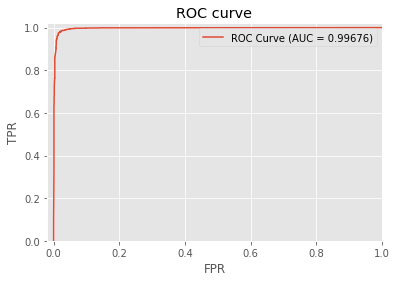

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.plot(results['roc_curve']['fpr'],
         results['roc_curve']['tpr'],
         label='ROC Curve (AUC = %0.5f)' %results['auc'])

plt.xlim([-0.02, 1.0])
plt.ylim([0., 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

We can check the classifier's prediction probabilities:

In [0]:
cls.classify(test)

class,probability
1,0.9729411602020264
1,0.9553410410881042
1,0.974677562713623
1,0.9735016226768494
1,0.9737840294837952
1,0.9603665471076965
1,0.9747217893600464
1,0.9525435566902161
1,0.9697101712226868
1,0.9747217893600464


Let's check how well, we can predict links by only using the _common-friends_:

In [0]:
cls = tc.classifier.create(train,features=["common_friends"], target="class")
results = cls.evaluate(test)
results

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.011980     | 0.943337          | 0.950187            | 0.481863          | 0.484305            |

| 2         | 0.020310     | 0.943337          | 0.950187            | 0.366204          | 0.369988            |

| 3         | 0.029139     | 0.943337          | 0.950187            | 0.294791          | 0.299696            |

| 4         | 0.038197     | 0.943337          | 0.950187            | 0.248283          | 0.254088            |

| 5         | 0.046980     | 0.943337          | 0.950187            | 0.217062          | 0.223826            |

| 10        | 0.086136     | 0.943337          | 0.950187            | 0.158910          | 0.169294            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.011701     | 0.943271          | 0.947696            | 0.228859          | 0.234596            |

| 2         | 0.020443     | 0.943271          | 0.947696            | 0.228904          | 0.234217            |

| 3         | 0.028887     | 0.943337          | 0.950187            | 0.228998          | 0.234239            |

| 4         | 0.037183     | 0.943337          | 0.950187            | 0.228969          | 0.234336            |

| 5         | 0.045894     | 0.943337          | 0.950187            | 0.228931          | 0.234346            |

| 10        | 0.072689     | 0.943337          | 0.950187            | 0.228958          | 0.234196            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.010796     | 0.943337          | 0.950187            | 0.228755          | 0.233318            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.020940     | 0.501902          | 0.483188            |

| 1         | 6        | 2.500000  | 0.030672     | 0.757673          | 0.757161            |

| 2         | 11       | 1.273200  | 0.059744     | 0.833224          | 0.816936            |

| 3         | 12       | 1.273200  | 0.067000     | 0.895724          | 0.885430            |

| 4         | 14       | 1.273200  | 0.075151     | 0.931204          | 0.927771            |

| 9         | 22       | 1.236380  | 0.105202     | 0.940386          | 0.941469            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.042064     | 0.790071          | 0.780822            |

| 2         | 3        | 0.055676     | 0.838799          | 0.824408            |

| 3         | 4        | 0.068324     | 0.887002          | 0.880448            |

| 4         | 5        | 0.080685     | 0.910939          | 0.900374            |

| 5         | 6        | 0.092429     | 0.926089          | 0.917808            |

| 8         | 9        | 0.126982     | 0.931204          | 0.927771            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.950186799501868
PROGRESS: RandomForestClassifier          : 0.950186799501868
PROGRESS: DecisionTreeClassifier          : 0.950186799501868
PROGRESS: SVMClassifier                   : 0.9414694894146949
PROGRESS: LogisticClassifier              : 0.9277708592777086
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


{'accuracy': 0.9417574069384654,
 'auc': 0.9834090052098164,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  163  |
 |      0       |        0        |  1827 |
 |      1       |        0        |   67  |
 |      1       |        1        |  1892 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9427005480817141,
 'log_loss': 0.16216062155883335,
 'precision': 0.9206812652068127,
 'recall': 0.96579887697805,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 1959 | 1990 |
 |   1e-05   | 1.0 | 1.0 | 1959 | 1990 |
 |   2e-05   | 1.0 |

The above example is a "toy example" for creating a link prediction classifier.  Even using the common-friends as a single feature can provide pretty good results. 

**Question: Why are the classification results so high?**

Use the above classifier to create better friend recommendations to a specific vertex:


In [0]:
def get_friends_of_friends_sframe(g, v):
    l = find_friends_of_friends(g,v)
    features_list = ['degree_v', 'degree_u', 'total_friends', 'common_friends', 'jaccard_coefficient', 'adamic_adar_index', 'friends_measure', 'class' ]
    data_dict = {f:[] for f in features_list}
    data_dict['name'] = []
    for u in l:
        d = get_features_dict(g,u, v)
        d['class'] = g.has_edge(u,v)
        for f in features_list:
            data_dict[f].append(d[f])
        data_dict["name"].append(u)
    return tc.SFrame(data_dict)

r_sf = get_friends_of_friends_sframe(g, 'ANT-MAN/DR. HENRY J.')
r_sf

adamic_adar_index,class,common_friends,degree_u,degree_v,friends_measure,jaccard_coefficient
0.8866099272230188,0,5,9,1082,1146,0.004604051565377533
1.305920443264264,0,7,16,1082,1183,0.006416131989000917
0.18769204995002464,0,1,12,1082,191,0.0009149130832570906
0.17029631145892507,0,1,13,1082,506,0.0009140767824497258
1.3212733068877829,0,8,21,1082,3006,0.0073059360730593605
0.9778067393446382,0,5,11,1082,1325,0.004595588235294118
1.3354097860319212,0,7,15,1082,2530,0.006422018348623854
0.32820526279117224,0,2,28,1082,1185,0.0018050541516245488
0.3457591341095701,0,2,10,1082,539,0.001834862385321101
1.0717004455483488,0,7,9,1082,2792,0.006457564575645757


In [0]:
features_list = ['degree_v', 'degree_u', 'total_friends', 'common_friends', 'jaccard_coefficient', 'adamic_adar_index', 'friends_measure' ]
cls = tc.classifier.create(train,features=features_list, target="class")

r_sf['probability'] = cls.classify(r_sf[features_list])['probability']
r_sf = r_sf.sort(['probability','common_friends'] , ascending=False) 
r_sf['name', 'common_friends', 'probability'].print_rows(100)
r_sf['name', 'common_friends', 'probability'][5000:5100].print_rows(100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.023363     | 0.982752          | 0.972603            | 0.453916          | 0.457568            |

| 2         | 0.043399     | 0.982621          | 0.977584            | 0.321600          | 0.326039            |

| 3         | 0.060118     | 0.984523          | 0.976339            | 0.237120          | 0.245204            |

| 4         | 0.077035     | 0.985047          | 0.976339            | 0.180549          | 0.191910            |

| 5         | 0.094315     | 0.985375          | 0.977584            | 0.141282          | 0.155616            |

| 10        | 0.162297     | 0.987277          | 0.978829            | 0.060035          | 0.081964            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.018911     | 0.962815          | 0.958904            | 0.199029          | 0.203783            |

| 2         | 0.031799     | 0.966422          | 0.961395            | 0.195362          | 0.197819            |

| 3         | 0.045559     | 0.972587          | 0.968867            | 0.182273          | 0.189427            |

| 4         | 0.057852     | 0.976456          | 0.973848            | 0.177093          | 0.184955            |

| 5         | 0.070713     | 0.978882          | 0.973848            | 0.174086          | 0.181656            |

| 10        | 0.124148     | 0.979866          | 0.972603            | 0.170790          | 0.179515            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.023675     | 0.982752          | 0.972603            | 0.163937          | 0.177366            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients    : 8

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.014899     | 0.501508          | 0.490660            |

| 1         | 5        | 5.000000  | 0.042316     | 0.925564          | 0.922790            |

| 2         | 6        | 5.000000  | 0.056211     | 0.919530          | 0.917808            |

| 3         | 8        | 2.164838  | 0.078563     | 0.953043          | 0.965131            |

| 4         | 10       | 2.164838  | 0.094486     | 0.956453          | 0.968867            |

| 9         | 20       | 1.507122  | 0.167904     | 0.965241          | 0.972603            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 15248

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients      : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.052138     | 0.911267          | 0.914072            |

| 2         | 3        | 0.072465     | 0.938418          | 0.946451            |

| 3         | 4        | 0.091802     | 0.957634          | 0.966376            |

| 4         | 5        | 0.110928     | 0.966684          | 0.973848            |

| 5         | 6        | 0.130175     | 0.972127          | 0.975093            |

| 9         | 10       | 0.203762     | 0.976587          | 0.978829            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9788293897882939
PROGRESS: RandomForestClassifier          : 0.9726027397260274
PROGRESS: DecisionTreeClassifier          : 0.9726027397260274
PROGRESS: SVMClassifier                   : 0.9726027397260274
PROGRESS: LogisticClassifier              : 0.9788293897882939
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.
+----------------------+----------------+--------------------+
|         name         | common_friends |    probability     |
+----------------------+----------------+--------------------+
|        PSIREN        |       2        | 0.9773673191666603 |
|        BAKER         |       2        | 0.9773673191666603 |
|       ELECTRA        |       2        | 0.9773673191666603 |
|        BONITA        |       2        | 0.977367319166660

In [0]:
 r_sf.sort('common_friends', ascending=False)

adamic_adar_index,class,common_friends,degree_u,degree_v,friends_measure,jaccard_coefficient
34.78753898606917,0,197,330,1082,55641,0.16213991769547326
32.49765233496148,0,184,521,1082,54425,0.12966878083157152
30.111859635387695,0,171,334,1082,50290,0.13734939759036144
30.55592420907979,0,171,311,1082,46327,0.13993453355155483
29.838643814460497,0,170,279,1082,50423,0.14273719563392107
29.188735513873617,0,168,300,1082,51439,0.13838550247116968
28.884310227841862,0,163,397,1082,49875,0.12386018237082067
27.31869529333024,0,160,304,1082,51232,0.13050570962479607
25.882310796918183,0,152,244,1082,49490,0.12947189097103917
25.82118585819315,0,152,228,1082,48346,0.13126079447322972


We can take a different approach to build the classifier by selecting a different set of negative links that 
are not selected completely in random (this selection may be very important in massive graphs - why?):

In [0]:
def get_random_friend_of_friend(g, v, max_tries=100):
    for i in range(max_tries):
        u = random.choice(list(g.neighbors(v)))
        x = random.choice(list(g.neighbors(u)))
        if not g.has_edge(v,x):
            return x
    return None
    
def select_random_non_existing_links_distance_2(g, n):
    select_links = set()
    v_list = list(g.nodes())
    while len(select_links) < n:
        v = random.choice(v_list)
        u = get_random_friend_of_friend(g, v)
        if u is None:
            continue
        select_links.add((v,u))
    return list(select_links)

negative_links = select_random_non_existing_links_distance_2(g, 10000)
len(negative_links)

10000

Let's retrain the classifier with the new example of negative links:

In [0]:
links_features = []
for i in tqdm(range(len(postive_links))):    
    u,v = postive_links[i]
    d = get_features_dict(g, u,v )
    d['class'] = True
    links_features.append(d)

for i in tqdm(range(len(negative_links))):    
    u,v = negative_links[i]
    d = get_features_dict(g, u,v )
    if d is None:
        continue
    d['class'] = False
    links_features.append(d)

    
features_list = ['degree_v', 'degree_u', 'total_friends', 'common_friends', 'jaccard_coefficient', 'adamic_adar_index', 'friends_measure', 'class' ]
data_dict = {f:[] for f in features_list}
for d in links_features:
    for feature in features_list:
        data_dict[feature].append(d[feature])
sf = tc.SFrame(data_dict)
sf

adamic_adar_index,class,common_friends,degree_u,degree_v,friends_measure,jaccard_coefficient,total_friends
2.8315183431931055,1,9,441,9,489,0.02040816326530612,441
7.8047430285302255,1,47,205,76,6406,0.20085470085470086,234
4.226829817451138,1,14,37,14,330,0.3783783783783784,37
11.08179466488045,1,57,190,147,6725,0.20357142857142857,280
10.197807150947451,1,60,86,60,4913,0.6976744186046512,86
5.275223526274641,1,27,237,38,2880,0.10887096774193548,248
3.4670412081381823,1,11,36,11,174,0.3055555555555556,36
5.100340353958189,1,16,16,20,288,0.8,20
7.578565619501717,1,37,279,59,4069,0.12292358803986711,301
9.082855303893577,1,43,1174,43,9224,0.036626916524701875,1174


In [0]:
test, train  = sf.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )
features_list = ['degree_v', 'degree_u', 'total_friends', 'common_friends', 'jaccard_coefficient', 'adamic_adar_index', 'friends_measure' ]
cls = tc.classifier.create(train,features=features_list, target="class")

Train size 16144
Test size: 3849
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 15336

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.021413     | 0.913732          | 0.929455            | 0.503350          | 0.496447            |

| 2         | 0.038279     | 0.919601          | 0.935644            | 0.396900          | 0.386255            |

| 3         | 0.055238     | 0.924035          | 0.933168            | 0.329177          | 0.317264            |

| 4         | 0.072213     | 0.925404          | 0.936881            | 0.284136          | 0.269014            |

| 5         | 0.090130     | 0.926578          | 0.935644            | 0.252259          | 0.238297            |

| 10        | 0.170715     | 0.935837          | 0.941832            | 0.179298          | 0.167267            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 15336

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.019962     | 0.922014          | 0.930693            | 0.267962          | 0.254543            |

| 2         | 0.043438     | 0.921557          | 0.930693            | 0.269928          | 0.256280            |

| 3         | 0.062055     | 0.925600          | 0.933168            | 0.265844          | 0.252310            |

| 4         | 0.077457     | 0.926448          | 0.938119            | 0.264322          | 0.248153            |

| 5         | 0.091392     | 0.925469          | 0.934406            | 0.266622          | 0.251310            |

| 10        | 0.151627     | 0.923970          | 0.935644            | 0.269394          | 0.251097            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 15336

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.022455     | 0.913732          | 0.929455            | 0.276852          | 0.257823            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 15336

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients    : 8

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.013897     | 0.524648          | 0.527228            |

| 1         | 5        | 5.000000  | 0.042816     | 0.869327          | 0.896040            |

| 2         | 6        | 5.000000  | 0.058048     | 0.794471          | 0.810644            |

| 3         | 11       | 1.009327  | 0.094084     | 0.857199          | 0.892327            |

| 4         | 13       | 1.009327  | 0.111398     | 0.872392          | 0.899752            |

| 9         | 24       | 3.166575  | 0.194840     | 0.887389          | 0.917079            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 15336

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients      : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.042076     | 0.840050          | 0.875000            |

| 2         | 3        | 0.065855     | 0.859937          | 0.894802            |

| 3         | 4        | 0.084625     | 0.873761          | 0.905941            |

| 4         | 5        | 0.103696     | 0.878065          | 0.909653            |

| 5         | 6        | 0.121823     | 0.878065          | 0.913366            |

| 6         | 7        | 0.140907     | 0.878260          | 0.913366            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9418316831683168
PROGRESS: RandomForestClassifier          : 0.9356435643564357
PROGRESS: DecisionTreeClassifier          : 0.9282178217821783
PROGRESS: SVMClassifier                   : 0.9170792079207921
PROGRESS: LogisticClassifier              : 0.9133663366336634
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [0]:
features_list = ['degree_v', 'degree_u', 'total_friends', 'common_friends', 'jaccard_coefficient', 'adamic_adar_index', 'friends_measure' ]
cls = tc.classifier.create(train,features=features_list, target="class")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 15336

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.020801     | 0.917514          | 0.904703            | 0.502187          | 0.506627            |

| 2         | 0.046843     | 0.921818          | 0.909653            | 0.395470          | 0.402411            |

| 3         | 0.065417     | 0.925013          | 0.913366            | 0.327928          | 0.336835            |

| 4         | 0.086551     | 0.925991          | 0.919554            | 0.283079          | 0.289876            |

| 5         | 0.106191     | 0.929708          | 0.923267            | 0.250089          | 0.258986            |

| 10        | 0.182121     | 0.938511          | 0.923267            | 0.173827          | 0.204931            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 15336

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.020066     | 0.919731          | 0.912129            | 0.272741          | 0.275910            |

| 2         | 0.037578     | 0.924622          | 0.915842            | 0.265789          | 0.272281            |

| 3         | 0.051467     | 0.924100          | 0.912129            | 0.267914          | 0.273487            |

| 4         | 0.065959     | 0.925469          | 0.910891            | 0.267919          | 0.274931            |

| 5         | 0.081931     | 0.926252          | 0.918317            | 0.268585          | 0.275208            |

| 10        | 0.141200     | 0.926578          | 0.924505            | 0.269447          | 0.274624            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 15336

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.023137     | 0.917514          | 0.904703            | 0.274555          | 0.291015            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 15336

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients    : 8

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.036300     | 0.522626          | 0.542079            |

| 1         | 5        | 5.000000  | 0.062283     | 0.871283          | 0.866337            |

| 2         | 6        | 5.000000  | 0.075560     | 0.794471          | 0.809406            |

| 3         | 11       | 0.999059  | 0.109076     | 0.859220          | 0.856436            |

| 4         | 13       | 0.999059  | 0.127218     | 0.874544          | 0.870050            |

| 9         | 24       | 3.174548  | 0.208584     | 0.887454          | 0.889851            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 15336

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients      : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.037225     | 0.842788          | 0.825495            |

| 2         | 3        | 0.057773     | 0.863132          | 0.840347            |

| 3         | 4        | 0.079090     | 0.878652          | 0.858911            |

| 4         | 5        | 0.100141     | 0.883607          | 0.871287            |

| 5         | 6        | 0.120332     | 0.884455          | 0.875000            |

| 7         | 8        | 0.159608     | 0.884520          | 0.875000            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9232673267326733
PROGRESS: RandomForestClassifier          : 0.9245049504950495
PROGRESS: DecisionTreeClassifier          : 0.9047029702970297
PROGRESS: SVMClassifier                   : 0.8898514851485149
PROGRESS: LogisticClassifier              : 0.875
PROGRESS: ---------------------------------------------
PROGRESS: Selecting RandomForestClassifier based on validation set performance.


In [0]:
r_sf['probability'] = cls.classify(r_sf[features_list])['probability']
r_sf = r_sf.sort([ 'probability'] , ascending=False) 
r_sf['name', 'common_friends', 'probability'].print_rows(100)
r_sf['name', 'common_friends', 'probability'][5000:5100].print_rows(100)

+----------------------+----------------+--------------------+
|         name         | common_friends |    probability     |
+----------------------+----------------+--------------------+
|       APPALLA        |       4        | 0.8772065043449402 |
| GARGOYLE/IGOR DRENKO |       4        | 0.8772065043449402 |
|    FENTON, BARNEY    |       4        | 0.8772065043449402 |
|       BI-BEAST       |       4        | 0.8772065043449402 |
|       BAAL II        |       4        | 0.8772065043449402 |
|  SCANLON, COMMANDER  |       4        | 0.8772065043449402 |
|        SANDY         |       4        | 0.8772065043449402 |
|       DRAGONUS       |       4        | 0.8772065043449402 |
|        TALOS         |       4        | 0.8772065043449402 |
|       HARRIER        |       4        | 0.8772065043449402 |
|       M'KAMBA        |       4        | 0.8772065043449402 |
|   MASTER MOLD III    |       4        | 0.8772065043449402 |
|    TANNER, JACKO     |       4        | 0.87720650434

## Example 2:  Predicting a Vertex's Attributes

A network structure can be utilized to predict various entity's attributes. For example, we can look at a classroom and construct a social network based on it. This later can be used to predict various vertex’s attributes, such as a student’s department or [final exam score](http://www.ise.bgu.ac.il/faculty/fire/pdf/fire2012predicting.pdf). Another example is using a network structure to predict an individual’s lifespan. This can be done by converting the individual’s family tree into a network, and using various features, such as parents’ and siblings’ lifespans to construct a classifier that can predict  [an individual’s lifespan]( https://arxiv.org/pdf/1311.4276).
In this section, we show a simple example of how to use networks to complete missing data. We will utilize the [WikiTree data]( https://www.wikitree.com/wiki/Help:Database_Dumps) to construct a network. Then, we use the network to predict an individual’s place of birth.

First let’s create a network with users’ place of birth:

**Note:** Due to privacy concerns, you need to ask permission in order to download the WikiTree dataset.


In [0]:
import turicreate as tc
import networkx as nx

sf = tc.SFrame.read_csv('../../datasets/dump_people_users.csv', delimiter="\t", verbose=False)['User ID','Father', 'Mother', 'Birth Location']
sf = sf[sf.apply(lambda r: r['Father'] != 0 and r['Mother'] != 0)]
sf['Birth Location'] = sf['Birth Location'].apply(lambda s: s.split(",")[-1] if len(s) > 0 else "") 
sf.materialize()

We loaded the data to an SFrame object. Next, let's join tables to create an SFrame object with data regarding the sibling connections:

In [0]:
sf2 = sf.join(sf, on=["Father"])
sf2 = sf2.remove_columns(["Mother.1", "Birth Location.1"])
sf2 = sf2[sf2['User ID'] != sf2['User ID.1']]
sf2 = sf2.rename({'User ID.1':'Sibling'})

In [0]:
sf3 = sf.join(sf, on=["Mother"])
sf3 = sf3.remove_columns(["Father.1", "Birth Location.1"])
sf3 = sf3[sf3['User ID'] != sf3['User ID.1']]
sf3 = sf3.rename({'User ID.1':'Sibling'})

Now, we can create a single SFrame with all the links:

In [0]:
links_sf = sf2['User ID', 'Father']
links_sf = links_sf.rename({'User ID': "User1", "Father": "User2"})

t_sf = sf2['User ID', 'Mother']
t_sf = t_sf.rename({'User ID': "User1", "Mother": "User2"})
links_sf = links_sf.append(t_sf)

t_sf = sf2['User ID', 'Sibling']
t_sf = t_sf.rename({'User ID': "User1", "Sibling": "User2"})
links_sf = links_sf.append(t_sf)

t_sf = sf3['User ID', 'Sibling']
t_sf = t_sf.rename({'User ID': "User1", "Sibling": "User2"})
links_sf = links_sf.append(t_sf)

links_sf


User1,User2
57,55
288,66
289,66
291,66
87,425
102,425
42,55
999,91
1000,91
1001,91


Let's create an SGraph object using the links and vertices data:

In [0]:
links_sf = links_sf.unique()
v_sf = sf['User ID','Birth Location']
sg = tc.SGraph(vertices=v_sf, edges=links_sf, vid_field='User ID', src_field='User1', dst_field='User2')
sg.summary()

{'num_edges': 63271969, 'num_vertices': 11021643}

Now, we can use the SGraph object to predict a vertex's location based on the majority of its neighborhood:

In [0]:
from collections import Counter
import random
def predict_location_according_to_majority(v_id):
    d = {}
    try:
        g = sg.get_neighborhood(v_id)
        locations = []
    except:
        return None
    for r in g.vertices:
        if r["__id"] == v_id:
            d['actual'] = r['Birth Location']
        else:
            locations.append(r['Birth Location'])
    c = Counter(locations)
    d['predict'] = c.most_common(1)
    
    return d
v_list = list(v_sf["User ID"])
random.shuffle(v_list)
v_list = v_list[:20]
for i in v_list:    
    p = predict_location_according_to_majority(i)
    if p is None:
        continue
    print("Location: %s"  % (p))

Location: {'actual': ' Massachusetts', 'predict': [(' Massachusetts', 10)]}
Location: {'actual': ' USA', 'predict': [(' USA', 14)]}
Location: {'actual': ' USA', 'predict': [('Alabama', 4)]}
Location: {'actual': ' England', 'predict': [(' England', 7)]}
Location: {'actual': ' Connecticut', 'predict': [(' Connecticut', 2)]}
Location: {'actual': '', 'predict': [('', 3)]}
Location: {'actual': ' United States', 'predict': [(' United States', 6)]}
Location: {'actual': '', 'predict': [(' United States', 3)]}
Location: {'actual': '', 'predict': [('', 6)]}
Location: {'actual': ' USA', 'predict': [(' USA', 2)]}
Location: {'actual': ' Mississippi', 'predict': [(' Mississippi', 5)]}
Location: {'actual': 'Maine', 'predict': [('Maine', 2)]}
Location: {'actual': 'New York', 'predict': [('', 3)]}
Location: {'actual': ' USA', 'predict': [(' USA', 8)]}
Location: {'actual': 'West Virginia', 'predict': [('West Virginia', 8)]}
Location: {'actual': ' England', 'predict': [(' England', 2)]}
Location: {'actua

## Example 3:  Identifying  Anomalous/Key Vertices

We can use a network structure to identify anomalous entities. For example, we can identify an anomalous vertex, which could be a spammer, socialbot, celebrity, or key employee, by identifying vertices which are connected to many different communities.

Let's analyze the [Enron Emails dataset](https://www.cs.cmu.edu/~./enron/) and construct the email networks by parsing the emails' _To_ and _From_ headers. Using the constructed Enron network, we will try to find methods to identify key employees in the company:

In [0]:
!mkdir ./datasets/enron
!wget -O ./datasets/enron/enron_mail_20150507.tar.gz https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz
!tar -zxvf ./datasets/enron/enron_mail_20150507.tar.gz -C ./datasets/enron/
!ls ./datasets/enron

Streaming output truncated to the last 5000 lines.
maildir/campbell-l/all_documents/759.
maildir/campbell-l/all_documents/538.
maildir/campbell-l/all_documents/876.
maildir/campbell-l/all_documents/321.
maildir/campbell-l/all_documents/990.
maildir/campbell-l/all_documents/1842.
maildir/campbell-l/all_documents/1460.
maildir/campbell-l/all_documents/1840.
maildir/campbell-l/all_documents/274.
maildir/campbell-l/all_documents/448.
maildir/campbell-l/all_documents/1692.
maildir/campbell-l/all_documents/400.
maildir/campbell-l/all_documents/224.
maildir/campbell-l/all_documents/188.
maildir/campbell-l/all_documents/1670.
maildir/campbell-l/all_documents/1678.
maildir/campbell-l/all_documents/706.
maildir/campbell-l/all_documents/254.
maildir/campbell-l/all_documents/1429.
maildir/campbell-l/all_documents/1704.
maildir/campbell-l/all_documents/529.
maildir/campbell-l/all_documents/1039.
maildir/campbell-l/all_documents/1694.
maildir/campbell-l/all_documents/1613.
maildir/campbell-l/all_doc

In [0]:
# Note this is a simple example of parsing the Enron dataset. The code may miss some of the links
import os, re
from glob import glob
from tqdm import tqdm_notebook as tqdm 

enron_data_set_path = "./datasets/enron/maildir"

def get_links_from_email(path):
    email_re = re.compile(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)")
    to_list = []
    from_list = []
    for line in open(path, "r", encoding='utf8', errors='ignore').readlines():
        line = line.strip().lower()
        if line.startswith("to:"):
            to_list = email_re.findall(line)
        if line.startswith("from:"):
            from_list = email_re.findall(line)
    links = set()
    if len(from_list) > 0 and len(to_list) >0:
        for e1 in from_list:
            for e2 in to_list:
                links.add((e1,e2))
    return links          

links = set()
files_list = [p for p in glob(f"{enron_data_set_path}/*/*/*") if "/inbox/" in p or "/sent/" in p]
print("Found %s files" % len(files_list))
for i in tqdm(range(len(files_list))):
    p = files_list[i]              
    if os.path.isfile(p):
        try:
            links |= get_links_from_email(p)
        except:
            continue

g = nx.DiGraph()    

Found 99279 files


In [0]:
g = nx.DiGraph()
g.add_edges_from(links)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 18590
Number of edges: 32392
Average in degree:   1.7424
Average out degree:   1.7424


Let's draw the network:

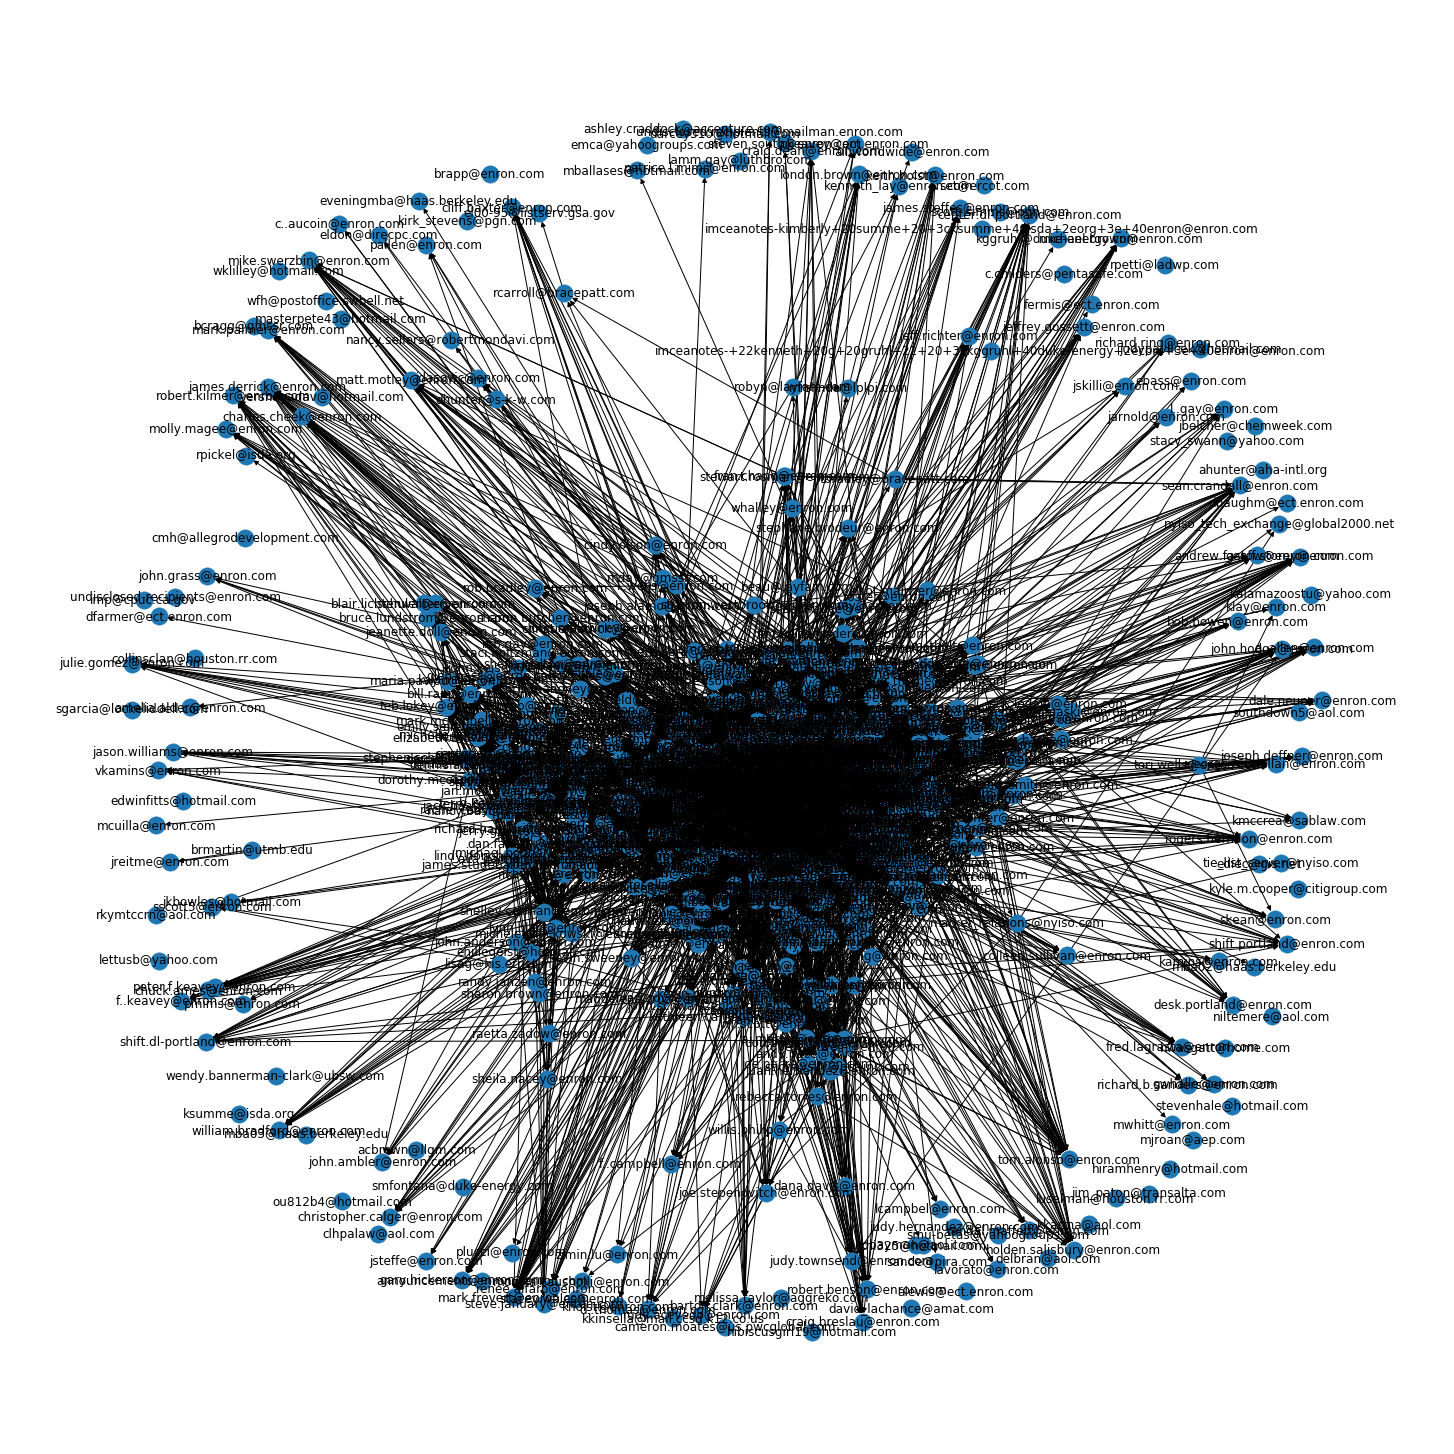

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

l = [n for n,degree in dict(g.degree()).items() if degree > 10]
h = g.subgraph(l)
plt.figure(figsize=(20,20))
nx.write_gml(h, "./datasets/enron/maildir/network.gml")
nx.draw_spring(h, with_labels=True)

Let's find the employees with the highest degree:

In [0]:
import operator
h_employees = sorted(dict(g.degree()).items(), key=operator.itemgetter(1), reverse=True)
h_employees[:10]

[('jeff.dasovich@enron.com', 683),
 ('sara.shackleton@enron.com', 641),
 ('tana.jones@enron.com', 584),
 ('gerald.nemec@enron.com', 534),
 ('kay.mann@enron.com', 471),
 ('kenneth.lay@enron.com', 466),
 ('vince.kaminski@enron.com', 434),
 ('debra.perlingiere@enron.com', 420),
 ('sally.beck@enron.com', 369),
 ('jeff.skilling@enron.com', 363)]

From [cross-referencing](http://www.inf.ed.ac.uk/teaching/courses/tts/assessed/roles.txt) the highest degree employees with  their organization roles,
we can observe that the list includes both the company CEO and some of the company management.

Let's find the network's communities and find employees that are connected to the highest number of communities:

In [0]:
from networkx.algorithms.community import greedy_modularity_communities
cc = greedy_modularity_communities(g.to_undirected())

# add the community each node belong to
for i in range(len(cc)):
    c = cc[i]
    if len(c) < 2:
        continue # skip this community
    for n in c:
        g.nodes[n]['community'] = i 

node_communities_num_dict = {}
for v in g.nodes():
    connected_communities = [g.nodes[u]['community'] for u in g.neighbors(v) if 'community' in g.nodes[u]]
    node_communities_num_dict[v] = len(set(connected_communities))

c_employees = sorted(node_communities_num_dict.items(), key=operator.itemgetter(1), reverse=True)
c_employees[:10] 

[('kay.mann@enron.com', 20),
 ('sara.shackleton@enron.com', 20),
 ('mark.taylor@enron.com', 20),
 ('tana.jones@enron.com', 19),
 ('elizabeth.sager@enron.com', 19),
 ('mark.haedicke@enron.com', 16),
 ('steven.kean@enron.com', 15),
 ('richard.sanders@enron.com', 15),
 ('jeff.dasovich@enron.com', 13),
 ('benjamin.rogers@enron.com', 13)]

In [0]:
set([e[0] for e in c_employees[:10]]) - set([e[0] for e in h_employees[:10]])

{'benjamin.rogers@enron.com',
 'elizabeth.sager@enron.com',
 'mark.haedicke@enron.com',
 'mark.taylor@enron.com',
 'richard.sanders@enron.com',
 'steven.kean@enron.com'}

We can see that finding vertices that are connected to the highest number of communities ranked some key employees (VPs) higher. In the past, we found using machine learning and network centrality properties to be an efficient way to [identify managers in organizational network](https://www.researchgate.net/profile/Michael_Fire/publication/256326703_Organization_Mining_Using_Online_Social_Networks/links/0046353bc52a153940000000/Organization-Mining-Using-Online-Social-Networks.pdf) and to [identifying malicious profiles in social networks](http://www.academia.edu/download/13963288/fake_ieee.pdf).

Another [interesting method for identify an Anomalous vertices](https://pdfs.semanticscholar.org/5b45/6027eb4296c4806c8ea7f46716ce2f3680fd.pdf) is by identifying vertices with many links that have relative low probabilities of existing.
Overall, we can use networks and machine learning as useful tools to identify interesting and useful patterns in data.

## Example 4 - Network Embedding
Combing new algorithms for embedding vertices, links, and networks, with machine learning algorithms can be very useful to tackle various tasks. In this example, we will use the [Karateclub package](https://github.com/benedekrozemberczki/karateclub), and use it to analyze [Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network#edges.csv):

In [0]:
!pip install karateclub

In [0]:
import networkx as nx
import turicreate as tc 


e_sf = tc.SFrame.read_csv("./datasets/the-marvel-universe-social-network/hero-network.csv")
g = nx.Graph() # Creating Undirected Graph
# adding all nodes and vertices at once
g.add_edges_from([(r['hero1'],r['hero2']) for r in e_sf])
print(nx.info(g))

Finished parsing file /content/datasets/the-marvel-universe-social-network/hero-network.csv

Parsing completed. Parsed 100 lines in 0.899027 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/the-marvel-universe-social-network/hero-network.csv

Parsing completed. Parsed 574467 lines in 0.533689 secs.

Name: 
Type: Graph
Number of nodes: 6426
Number of edges: 167219
Average degree:  52.0445


In [0]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 6426
Number of edges: 167219
Average degree:  52.0445


Let's convert the network from nodes represented by string to network with nodes represented by numbers:

In [0]:
?zip

In [0]:
l =  zip(g.nodes(), range(len(g.nodes())))
l = list(l)
l[:10]

[('LITTLE, ABNER', 0),
 ('PRINCESS ZANDA', 1),
 ("BLACK PANTHER/T'CHAL", 2),
 ('STEELE, SIMON/WOLFGA', 3),
 ('FORTUNE, DOMINIC', 4),
 ('ERWIN, CLYTEMNESTRA', 5),
 ('IRON MAN/TONY STARK ', 6),
 ('IRON MAN IV/JAMES R.', 7),
 ('RAVEN, SABBATH II/EL', 8),
 ('CARNIVORE/COUNT ANDR', 9)]

In [0]:
nodes_dict = dict(l)
r_node_dict = {v:k for k,v in nodes_dict.items()}
list(r_node_dict.items())[:10]

[(0, 'LITTLE, ABNER'),
 (1, 'PRINCESS ZANDA'),
 (2, "BLACK PANTHER/T'CHAL"),
 (3, 'STEELE, SIMON/WOLFGA'),
 (4, 'FORTUNE, DOMINIC'),
 (5, 'ERWIN, CLYTEMNESTRA'),
 (6, 'IRON MAN/TONY STARK '),
 (7, 'IRON MAN IV/JAMES R.'),
 (8, 'RAVEN, SABBATH II/EL'),
 (9, 'CARNIVORE/COUNT ANDR')]

In [0]:
h = nx.Graph()
for e1,e2 in g.edges():
  h.add_edge(nodes_dict[e1], nodes_dict[e2])
print(nx.info(g))
print(nx.info(h))

Name: 
Type: Graph
Number of nodes: 6426
Number of edges: 167219
Average degree:  52.0445
Name: 
Type: Graph
Number of nodes: 6426
Number of edges: 167219
Average degree:  52.0445


In [0]:
import karateclub

model = karateclub.DeepWalk()

model.fit(h)
embedding = model.get_embedding()
embedding

array([[-0.88067365, -0.06065808, -0.7443283 , ..., -0.0575035 ,
         0.39686418, -0.67599267],
       [-1.3872892 ,  0.04968242, -0.5780249 , ...,  0.46900958,
         1.2920862 , -0.8427452 ],
       [ 0.35109875, -0.93315095, -0.62074107, ..., -0.46024984,
         0.42840907,  0.5362229 ],
       ...,
       [ 0.10198443,  1.064613  , -0.07972986, ...,  0.7773224 ,
         0.84120226,  1.3947873 ],
       [ 0.32920364,  1.2877096 ,  0.46282014, ...,  0.62893605,
         0.51808846, -0.05647787],
       [-0.08053824,  0.74897635,  0.62080514, ...,  1.1104088 ,
         0.8458283 ,  0.02218664]], dtype=float32)

Let's find the node that is most similar to Spiderman:

In [0]:
v_num = nodes_dict['SPIDER-MAN/PETER PAR']
spidermane_vec = embedding[v_num]
spidermane_vec

array([-0.35738605,  0.39758995, -0.97029394, -1.0388025 , -0.22117902,
       -0.62493205,  0.5401509 , -0.8653559 ,  0.28743982,  0.37671044,
        0.1963367 ,  0.69385433,  0.678847  , -0.27642685,  0.0489605 ,
       -0.4952339 ,  0.13598518, -0.13252462,  0.2796474 ,  0.8357877 ,
       -0.12790313, -0.02409471,  0.00601377,  0.24959028,  1.0386755 ,
       -0.21734516,  0.52299815,  0.77506363,  0.19704   , -0.4940527 ,
       -0.5493932 ,  0.01022207,  0.6727432 , -0.23763977,  0.17646387,
       -0.5312556 ,  0.52256584,  1.1949232 , -0.6447401 ,  0.24441928,
       -0.9442965 , -0.20524597,  0.11963514,  0.45124885,  0.71280146,
       -0.57059646,  0.27975792, -0.65879387, -0.14975739,  0.04984941,
       -0.05182945, -0.06843954,  0.37825787,  0.19327997, -0.23832732,
        0.2097448 ,  0.86593217, -0.8078008 , -0.5538239 , -0.6115477 ,
        0.38250738,  0.1784221 , -0.7475383 ,  0.0562712 , -0.52900195,
        0.14339721, -0.97692114,  0.14992784,  0.10699464,  0.28

In [0]:
# more details in https://stackoverflow.com/questions/32446703/find-closest-vector-from-a-list-of-vectors-python 
# and 
from scipy import spatial
tree = spatial.KDTree(embedding)


In [0]:
tree.query(x=spidermane_vec, k=3)


(array([0.        , 5.2355255 , 5.45248038]), array([ 48, 152, 160]))

We can see that nodes 152 and 160 are the closest to Spiderman, let's look who they are:

In [0]:
r_node_dict[152]

'WATSON-PARKER, MARY '

In [0]:
r_node_dict[160]

'JAMESON, J. JONAH'

Let's use [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) to perform dimensionality reduction of each node's vector to plot the nodes in 2D:

In [0]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

X = embedding
print("Computed X: ", X.shape)
X_embedded = TSNE(n_components=2,perplexity=20, n_iter=5000, verbose=2).fit_transform(X)
print("Computed t-SNE", X_embedded.shape)


Computed X:  (6426, 128)
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 6426 samples in 0.074s...
[t-SNE] Computed neighbors for 6426 samples in 9.710s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6426
[t-SNE] Computed conditional probabilities for sample 2000 / 6426
[t-SNE] Computed conditional probabilities for sample 3000 / 6426
[t-SNE] Computed conditional probabilities for sample 4000 / 6426
[t-SNE] Computed conditional probabilities for sample 5000 / 6426
[t-SNE] Computed conditional probabilities for sample 6000 / 6426
[t-SNE] Computed conditional probabilities for sample 6426 / 6426
[t-SNE] Mean sigma: 2.400802
[t-SNE] Computed conditional probabilities in 0.208s
[t-SNE] Iteration 50: error = 96.2724304, gradient norm = 0.0849375 (50 iterations in 4.187s)
[t-SNE] Iteration 100: error = 93.1221313, gradient norm = 0.0685107 (50 iterations in 3.727s)
[t-SNE] Iteration 150: error = 93.2942505, gradient norm = 0.0415872 (50 iterations in 2.970s)
[t-SNE

In [0]:
df = pd.DataFrame(columns=['x', 'y', 'name'])
df['x'], df['y'], df['name'] = X_embedded[:,0], X_embedded[:,1], [r_node_dict[i] for i in range(len(h.nodes()))]
df

,x,y,name
0,55.580376,28.527428,"LITTLE, ABNER"
1,51.497845,58.191986,PRINCESS ZANDA
2,11.087833,-10.702829,BLACK PANTHER/T'CHAL
3,34.440186,45.649830,"STEELE, SIMON/WOLFGA"
4,34.669205,45.842724,"FORTUNE, DOMINIC"
...,...,...,...
6421,-1.062684,41.412361,BLACKWULF
6422,-1.085779,41.440674,"JILLETE, RANDI"
6423,-0.957050,41.446556,"JENKINS, WALTER"
6424,20.635687,58.738892,"WAGNER, ERNIE WHACK"


In [0]:
import plotly.express as px
%matplotlib inline

fig = px.scatter(df, x="x", y="y", hover_name="name")
fig.show()


In [0]:
selected_heros = [n for n, deg in g.degree() if deg > 200]
df2 = df[df['name'].isin(selected_heros)]
df2


,x,y,name
2,11.087833,-10.702829,BLACK PANTHER/T'CHAL
6,11.013515,-9.204627,IRON MAN/TONY STARK
7,58.597355,18.460943,IRON MAN IV/JAMES R.
17,3.747700,-42.223003,"ROM, SPACEKNIGHT"
23,-7.563079,-6.666814,MYSTIQUE/RAVEN DARKH
...,...,...,...
2395,-69.503838,2.327134,GUARDIAN/JAMES MACDO
2586,35.963348,13.656219,SILHOUETTE
2699,-9.888051,-14.104476,"MADDICKS, ARTHUR ART"
2984,-55.375355,-53.312737,CHAMBER/JONOTHON STA


In [0]:
import plotly.express as px
%matplotlib inline

fig = px.scatter(df2, x="x", y="y", hover_name="name")
fig.show()


## Further Readings
* Fire, Michael, et al. "[Link prediction in social networks using computationally efficient topological features](http://www.ise.bgu.ac.il/faculty/liorr/conf5.pdf),” 2011

* Altshuler, Yaniv, et al. "[How many makes a crowd? On the evolution of learning as a factor of community coverage](http://web.media.mit.edu/~yanival/SBP-How_many_makes_a_crowd.pdf)." International Conference on Social  Computing, Behavioral-Cultural Modeling, and Prediction. Springer, Berlin, Heidelberg, 2012.

* Fire, Michael, et al. "[Predicting student exam’s scores by analyzing social network data](http://www.ise.bgu.ac.il/faculty/liorr/fire2012predicting.pdf)." International Conference on Active Media Technology. Springer, Berlin, Heidelberg, 2012

* Fire, Michael, and Yuval Elovici. "[Data mining of online genealogy datasets for revealing lifespan patterns in human population](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.764.2039&rep=rep1&type=pdf)." ACM Transactions on Intelligent Systems and Technology (TIST) 6.2 (2015): 28


* Fire, Michael, and Rami Puzis. "[Organization mining using online social networks](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.759.185&rep=rep1&type=pdf)." Networks and Spatial Economics 16.2 (2016): 545-578 


* Kagan, Dima, Yuval Elovichi, and Michael Fire. "[Generic anomalous vertices detection utilizing a link prediction algorithm.](https://arxiv.org/pdf/1610.07525.pdf)" Social Network Analysis and Mining 8.1 (2018): 27

* Primož Godec, [Graph Embeddings — The Summary](https://towardsdatascience.com/graph-embeddings-the-summary-cc6075aba007)

 